<div style="background-color:#ffe4de; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#ed2f00;"><b>Codelords - Explatory Data Analysis</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;"> <strong>Thabo Maibi : </strong> 23141360 </p>
</div>

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

train_dir = '/content/drive/My Drive/Patch_Perfect_Data/train_images/train_images'
train_annotations = '/content/drive/My Drive/Patch_Perfect_Data/train_annotations/train_annotations'
csv_dir = '/content/drive/My Drive/pothole_data/'
test_dir = '/content/drive/My Drive/Patch_Perfect_Data/test_images/test_images'
supplementary_dir = '/content/drive/My Drive/pothole_data/supplementary'
supplementary_annotations = '/content/drive/My Drive/Supplementary_Data/train_annotations_2'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Training set

In [ ]:
# Get the list of image files
image_files = os.listdir(train_dir)
# Filter to include only .png files
image_files = [f for f in image_files if f.endswith('.jpg')]

# Create DataFrame for train images
train_image_data = {
    'number': list(range(1, len(image_files) + 1)),
    'full_image_name': image_files,
    'pothole_id': [f.replace('.jpg', '').replace('p', '') for f in image_files]
}
train_image_df = pd.DataFrame(train_image_data)

train_image_df

,number,full_image_name,pothole_id
0,1,p1032.jpg,1032
1,2,p1035.jpg,1035
2,3,p101.jpg,101
3,4,p1033.jpg,1033
4,5,p1034.jpg,1034
...,...,...,...
480,481,p474.jpg,474
481,482,p463.jpg,463
482,483,p471.jpg,471
483,484,p498.jpg,498


In [ ]:
train_image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   number           485 non-null    int64 
 1   full_image_name  485 non-null    object
 2   pothole_id       485 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.5+ KB


In [ ]:
train_image_df['pothole_id'] = train_image_df['pothole_id'].astype(int)

In [ ]:
# Get the list of annotation files
annotation_files = os.listdir(train_annotations)
# Filter to include only .txt files
annotation_files = [f for f in annotation_files if f.endswith('.txt')]

# Create DataFrame for train annotations
annotation_data = {
    'number': list(range(1, len(annotation_files) + 1)),
    'full_txt_name': annotation_files,
    'pothole_id': [f.replace('p', '').replace('.txt', '') for f in annotation_files]
}
annotation_df = pd.DataFrame(annotation_data)
annotation_df

,number,full_txt_name,pothole_id
0,1,p101.txt,101
1,2,p1039.txt,1039
2,3,p1049.txt,1049
3,4,p1048.txt,1048
4,5,p1037.txt,1037
...,...,...,...
477,478,p477.txt,477
478,479,p471.txt,471
479,480,p500.txt,500
480,481,p472.txt,472


In [ ]:
annotation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   number         482 non-null    int64 
 1   full_txt_name  482 non-null    object
 2   pothole_id     482 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.4+ KB


In [ ]:
train_image_df['pothole_id'] = train_image_df['pothole_id'].astype(int)

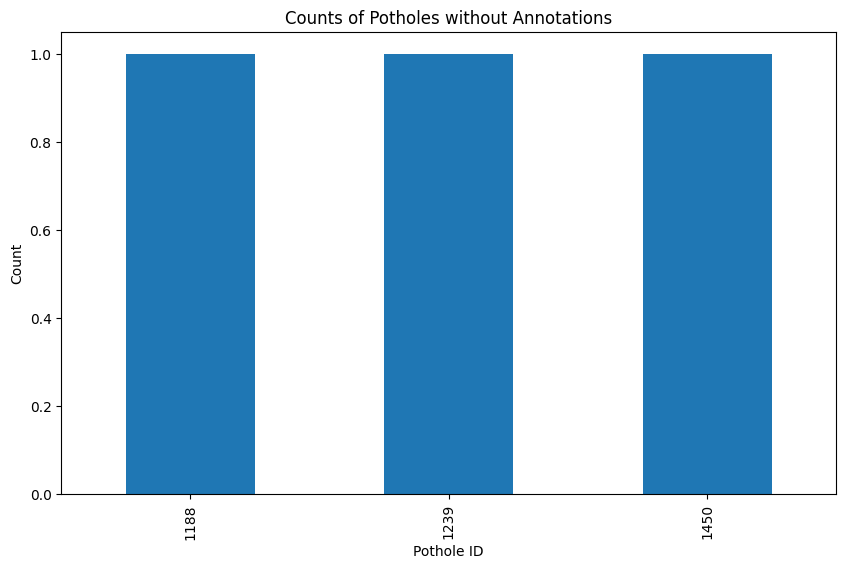

In [ ]:
import matplotlib.pyplot as plt

# Block 1: Visualization of Counts in Supplementary Images and Annotations DataFrames

def visualize_counts(df, title, x_label, y_label):
    counts = df['pothole_id'].value_counts()
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


# Find potholes that do not have corresponding annotations
potholes_without_annotations = train_image_df[~train_image_df['pothole_id'].isin(annotation_df['pothole_id'])]

# Visualize counts of Potholes without Annotations
visualize_counts(potholes_without_annotations, 'Counts of Potholes without Annotations', 'Pothole ID', 'Count')





In [ ]:
# Read CSV files
train_labels = pd.read_csv(os.path.join(csv_dir, 'train_labels.csv'))

# Rename the columns using a dictionary
train_labels.rename(columns={"Bags used ": "Bags_used", "Pothole number": "Pothole_Number"}, inplace=True)

# Display the dataframe
train_labels

,Pothole_Number,Bags_used
0,101,0.5
1,102,1.0
2,106,0.5
3,107,0.5
4,109,0.5
...,...,...
639,1445,0.5
640,1446,0.5
641,1448,2.0
642,1449,0.5


In [ ]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pothole_Number  644 non-null    int64  
 1   Bags_used       644 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 10.2 KB


In [ ]:
# Calculate summary statistics using describe() to check outliers
summary = train_labels.describe()

# Calculate IQR for each column from summary statistics
Q1 = summary.loc['25%']
Q3 = summary.loc['75%']
IQR = Q3 - Q1

# Calculate lower and upper limits for potential outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = ((train_labels < lower_limit) | (train_labels > upper_limit))

# Display the potential outliers
print(outliers)

     Pothole_Number  Bags_used
0             False      False
1             False      False
2             False      False
3             False      False
4             False      False
..              ...        ...
639           False      False
640           False      False
641           False       True
642           False      False
643           False       True

[644 rows x 2 columns]


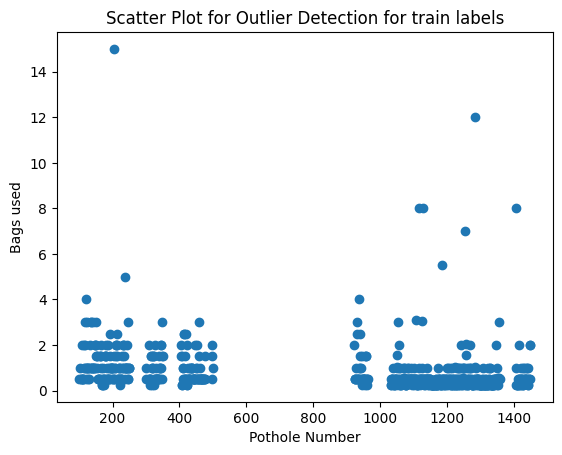

In [ ]:
plt.scatter(train_labels['Pothole_Number'], train_labels['Bags_used'])
plt.xlabel('Pothole Number')
plt.ylabel('Bags used')
plt.title('Scatter Plot for Outlier Detection for train labels')
plt.show()

In [ ]:
# Identify Potholes Present in Images but Not in Labels

# Find potholes in supplementary images that do not have corresponding labels
potholes_without_bags_train = train_image_df[~train_image_df['pothole_id'].isin(train_labels['Pothole_Number'])]

# Display potholes without "Bags used"
print("Potholes in Train Images without Bags used Labels:")
print(potholes_without_bags_train)


Potholes in Train Images without Bags used Labels:
     number full_image_name  pothole_id
309     310       p1923.jpg        1923
312     313       p1925.jpg        1925
317     318       p1926.jpg        1926
323     324       p1939.jpg        1939
324     325       p1931.jpg        1931
..      ...             ...         ...
414     415       p2025.jpg        2025
415     416       p2020.jpg        2020
416     417       p2022.jpg        2022
417     418       p2017.jpg        2017
418     419       p2021.jpg        2021

[96 rows x 3 columns]


#Test set

In [ ]:
# Get the list of image files
test_image_files = os.listdir(test_dir)
# Filter to include only .png files
test_image_files = [f for f in test_image_files if f.endswith('.jpg')]

# Create DataFrame for train images
test_image_data = {
    'number': list(range(1, len(test_image_files) + 1)),
    'full_image_name': test_image_files,
    'pothole_id': [f.replace('.jpg', '').replace('p', '') for f in test_image_files]
}
test_image_df = pd.DataFrame(test_image_data)

test_image_df.head(5)

,number,full_image_name,pothole_id
0,1,p1115.jpg,1115
1,2,p105.jpg,105
2,3,p108.jpg,108
3,4,p1040.jpg,1040
4,5,p103.jpg,103


In [ ]:
test_image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   number           30 non-null     int64 
 1   full_image_name  30 non-null     object
 2   pothole_id       30 non-null     object
dtypes: int64(1), object(2)
memory usage: 848.0+ bytes


In [ ]:
test_image_df['pothole_id'] = test_image_df['pothole_id'].astype(int)

In [ ]:
# Identify if there are labels for test Images

potholes_without_bags_train = test_image_df[~test_image_df['pothole_id'].isin(train_labels['Pothole_Number'])]

# Display potholes without "Bags used"
print("Potholes in Test Images without Bags used Labels:")
print(potholes_without_bags_train)


Potholes in Train Images without Bags used Labels:
    number full_image_name  pothole_id
0        1       p1115.jpg        1115
1        2        p105.jpg         105
2        3        p108.jpg         108
3        4       p1040.jpg        1040
4        5        p103.jpg         103
5        6       p1086.jpg        1086
6        7        p104.jpg         104
7        8        p143.jpg         143
8        9       p1280.jpg        1280
9       10       p1161.jpg        1161
10      11       p1438.jpg        1438
11      12       p1181.jpg        1181
12      13       p1430.jpg        1430
13      14       p1134.jpg        1134
14      15       p1270.jpg        1270
15      16       p1409.jpg        1409
16      17       p1296.jpg        1296
17      18        p114.jpg         114
18      19       p1250.jpg        1250
19      20       p1205.jpg        1205
20      21       p1278.jpg        1278
21      22       p1162.jpg        1162
22      23       p1198.jpg        1198
23      24   

#Supplementary data

In [ ]:
# Get the list of supplementary image files
supplementary_image_files = os.listdir(supplementary_dir)
# Filter to include only .png files
supplementary_image_files = [f for f in supplementary_image_files if f.endswith('.jpg')]

# Create DataFrame for supplementary images
supplementary_image_data = {
    'number': list(range(1, len(supplementary_image_files) + 1)),
    'full_image_name': supplementary_image_files,
    'pothole_id': [f.replace('.jpg', '').replace('p', '') for f in supplementary_image_files]
}
supplementary_image_df = pd.DataFrame(supplementary_image_data)

supplementary_image_df.head()

,number,full_image_name,pothole_id
0,1,p997.jpg,997
1,2,p998.jpg,998
2,3,p928.jpg,928
3,4,p995.jpg,995
4,5,p996.jpg,996


In [ ]:
supplementary_image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   number           479 non-null    int64 
 1   full_image_name  479 non-null    object
 2   pothole_id       479 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.4+ KB


In [ ]:
supplementary_image_df['pothole_id'] = supplementary_image_df['pothole_id'].astype(int)

In [ ]:
# Get the list of supplementary annotation files
supplementary_annotation_files = os.listdir(supplementary_annotations)
# Filter to include only .txt files
supplementary_annotation_files = [f for f in supplementary_annotation_files if f.endswith('.txt')]

# Create DataFrame for supplementary annotations
supplementary_annotation_data = {
    'number': list(range(1, len(supplementary_annotation_files) + 1)),
    'full_txt_name': supplementary_annotation_files,
    'pothole_id': [f.replace('p', '').replace('.txt', '') for f in supplementary_annotation_files]
}
supplementary_annotation_df = pd.DataFrame(supplementary_annotation_data)

supplementary_annotation_df.head()

,number,full_txt_name,pothole_id
0,1,p1000.txt,1000
1,2,p1002.txt,1002
2,3,p1007.txt,1007
3,4,p1006.txt,1006
4,5,p1029.txt,1029


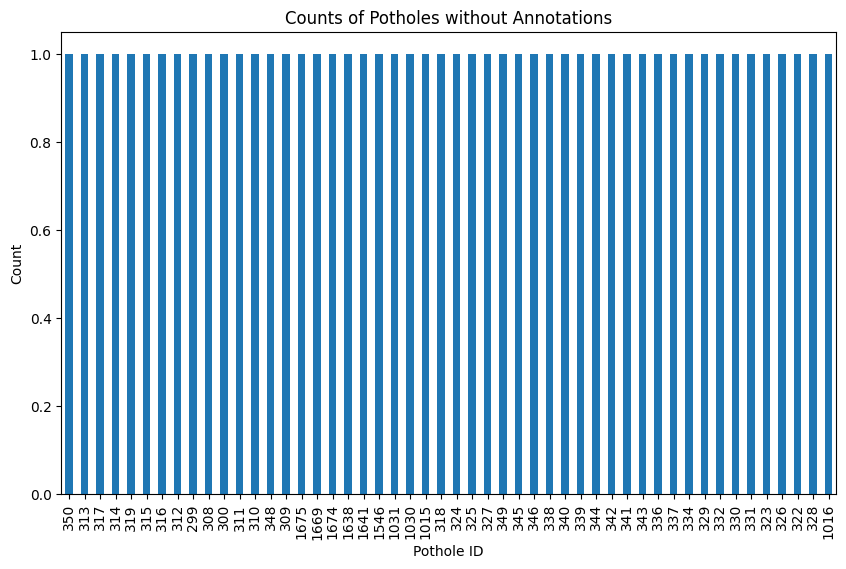

In [ ]:
def visualize_counts(df, title, x_label, y_label):
    counts = df['pothole_id'].value_counts()
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


# Find potholes that do not have corresponding annotations
potholes_without_annotations = supplementary_image_df[~supplementary_image_df['pothole_id'].isin(supplementary_annotation_df['pothole_id'])]

# Visualize counts of Potholes without Annotations
visualize_counts(potholes_without_annotations, 'Counts of Potholes without Annotations', 'Pothole ID', 'Count')

In [ ]:
# Read CSV files
supplementary_labels = pd.read_csv(os.path.join(csv_dir, 'supplementary_labels.csv'))

# Rename the columns using a dictionary
supplementary_labels.rename(columns={"Bags used ": "Bags_used", "Pothole number": "Pothole_Number"}, inplace=True)

# Display the dataframe
supplementary_labels

,Pothole_Number,Bags_used
0,38,1.0
1,39,0.5
2,40,0.5
3,41,1.0
4,42,1.0
...,...,...
435,1682,2.0
436,1683,1.5
437,1684,1.0
438,1685,1.5


In [ ]:
# Identify Potholes Present in Images but Not in Labels

# Find potholes in supplementary images that do not have corresponding labels
potholes_without_bags_supplementary = supplementary_image_df[~supplementary_image_df['pothole_id'].isin(supplementary_labels['Pothole_Number'])]

# Display potholes without "Bags used"
print("Potholes in Supplementary Images without Bags used in Labels:")
print(potholes_without_bags_supplementary)

Potholes in Supplementary Images without Bags used in Labels:
     number full_image_name  pothole_id
114     115        p350.jpg         350
116     117        p348.jpg         348
117     118        p349.jpg         349
118     119        p345.jpg         345
121     122        p346.jpg         346
122     123        p338.jpg         338
123     124        p340.jpg         340
124     125        p339.jpg         339
125     126        p344.jpg         344
126     127        p342.jpg         342
127     128        p341.jpg         341
128     129        p343.jpg         343
129     130        p336.jpg         336
130     131        p337.jpg         337
131     132        p334.jpg         334
132     133        p329.jpg         329
133     134        p332.jpg         332
134     135        p330.jpg         330
135     136        p331.jpg         331
136     137        p323.jpg         323
137     138        p326.jpg         326
138     139        p322.jpg         322
139     140       

In [ ]:
# Calculate summary statistics using describe() to check outliers
summary = supplementary_labels.describe()

# Calculate IQR for each column from summary statistics
Q1 = summary.loc['25%']
Q3 = summary.loc['75%']
IQR = Q3 - Q1

# Calculate lower and upper limits for potential outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = ((supplementary_labels < lower_limit) | (supplementary_labels > upper_limit))

# Display the potential outliers
print(outliers)

     Pothole_Number  Bags_used
0             False      False
1             False      False
2             False      False
3             False      False
4             False      False
..              ...        ...
435           False       True
436           False      False
437           False      False
438           False      False
439           False      False

[440 rows x 2 columns]


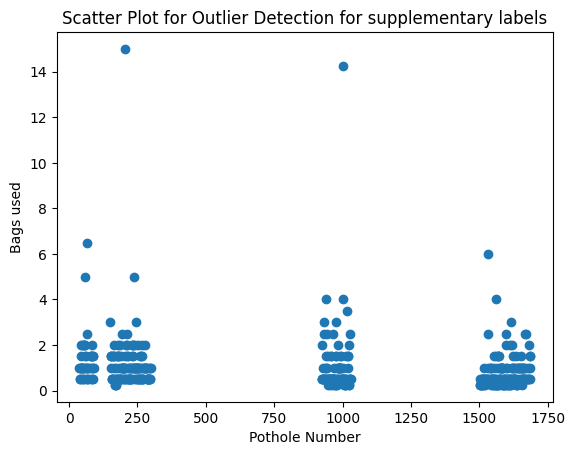

In [ ]:
plt.scatter(supplementary_labels['Pothole_Number'], supplementary_labels['Bags_used'])
plt.xlabel('Pothole Number')
plt.ylabel('Bags used')
plt.title('Scatter Plot for Outlier Detection for supplementary labels')
plt.show()

#Created volume Dataset

In [ ]:
train_volumes = pd.read_csv(os.path.join(csv_dir, 'train_volumes.csv'))
supplementary_volumes = pd.read_csv(os.path.join(csv_dir, 'supplementary_volumes.csv'))

In [ ]:
train_volumes

,Image_Name,Volume
0,p1032.jpg,3546.23
1,p1035.jpg,1153.81
2,p101.jpg,7567.50
3,p1033.jpg,2048.50
4,p1034.jpg,1799.70
...,...,...
472,p467.jpg,3015.17
473,p474.jpg,3090.82
474,p463.jpg,5984.87
475,p498.jpg,395.35


In [ ]:
# Remove "p" and ".jpg", rename the column, and convert to int
train_volumes['pothole_id'] = train_volumes['Image_Name'].str.replace('.jpg', '').str.replace('p', '').astype(int)

# Drop the old Image_Name column
train_volumes.drop(columns=['Image_Name'], inplace=True)

In [ ]:
train_volumes

,Volume,pothole_id
0,3546.23,1032
1,1153.81,1035
2,7567.50,101
3,2048.50,1033
4,1799.70,1034
...,...,...
472,3015.17,467
473,3090.82,474
474,5984.87,463
475,395.35,498


In [ ]:
# Calculate summary statistics using describe() to check outliers
summary = train_volumes.describe()

# Calculate IQR for each column from summary statistics
Q1 = summary.loc['25%']
Q3 = summary.loc['75%']
IQR = Q3 - Q1

# Calculate lower and upper limits for potential outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = ((train_volumes < lower_limit) | (train_volumes > upper_limit))

# Display the potential outliers
print(outliers)

     Volume  pothole_id
0     False       False
1     False       False
2     False        True
3     False       False
4     False       False
..      ...         ...
472   False        True
473   False        True
474   False        True
475   False        True
476   False        True

[477 rows x 2 columns]


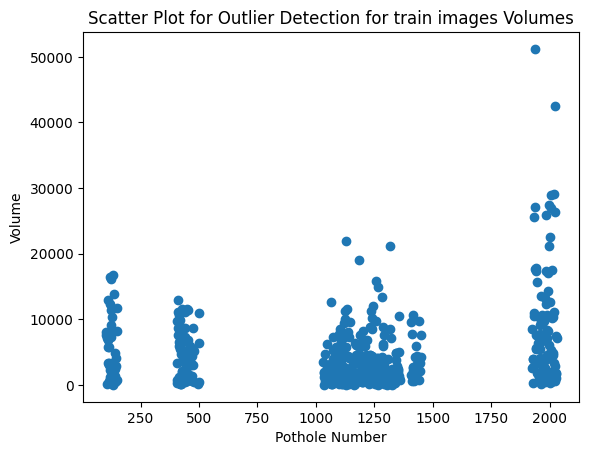

In [ ]:
plt.scatter(train_volumes['pothole_id'], train_volumes['Volume'])
plt.xlabel('Pothole Number')
plt.ylabel('Volume')
plt.title('Scatter Plot for Outlier Detection for train images Volumes')
plt.show()